# 0. Library

In [242]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Sklearn
# Data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Model
from sklearn.ensemble import RandomForestRegressor
# sklearn - analyze model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


# 1. Data process & Analyze

In [243]:
# Loading data
raw = "./datasets/clean_data.csv"

clean_df = pd.read_csv(raw, index_col=0)
print(clean_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5656 entries, 0 to 5655
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gender                                        5656 non-null   object 
 1   Age                                           5656 non-null   object 
 2   Height (cm)                                   5656 non-null   float64
 3   Weight (kg)                                   5656 non-null   float64
 4   Therapeutic Dose of Warfarin                  5656 non-null   float64
 5   INR on Reported Therapeutic Dose of Warfarin  5656 non-null   float64
 6   Current Smoker                                5656 non-null   float64
dtypes: float64(5), object(2)
memory usage: 353.5+ KB
None


In [244]:
# Encode <object> type feature
le_encoder = LabelEncoder()

G = clean_df[["Gender"]]
G_encoded = le_encoder.fit_transform(G)
G_correspond = {}
for cl in le_encoder.classes_:
    G_correspond.update({cl:le_encoder.transform([cl])[0]})
print(f'Gender:{G_correspond}')

A = clean_df[["Age"]]
A_encoded = le_encoder.fit_transform(A)
A_correspond = {}
for cl in le_encoder.classes_:
    A_correspond.update({cl:le_encoder.transform([cl])[0]})
print(f'Age:{A_correspond}')

clean_df["Gender"] = pd.Series(G_encoded).astype("float64")
clean_df["Age"] = pd.Series(A_encoded).astype("float64")

print(clean_df.info())

# Save to encoded_clean_data.csv
clean_df.to_csv("./datasets/encoded_clean_data.csv")


Gender:{'female': 0, 'male': 1}
Age:{'10 - 19': 0, '20 - 29': 1, '30 - 39': 2, '40 - 49': 3, '50 - 59': 4, '60 - 69': 5, '70 - 79': 6, '80 - 89': 7, '90+': 8}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5656 entries, 0 to 5655
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gender                                        5656 non-null   float64
 1   Age                                           5656 non-null   float64
 2   Height (cm)                                   5656 non-null   float64
 3   Weight (kg)                                   5656 non-null   float64
 4   Therapeutic Dose of Warfarin                  5656 non-null   float64
 5   INR on Reported Therapeutic Dose of Warfarin  5656 non-null   float64
 6   Current Smoker                                5656 non-null   float64
dtypes: float64(7)
memory usage: 353.5 KB
None


c:\Users\111\Programming\Python\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\111\Programming\Python\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


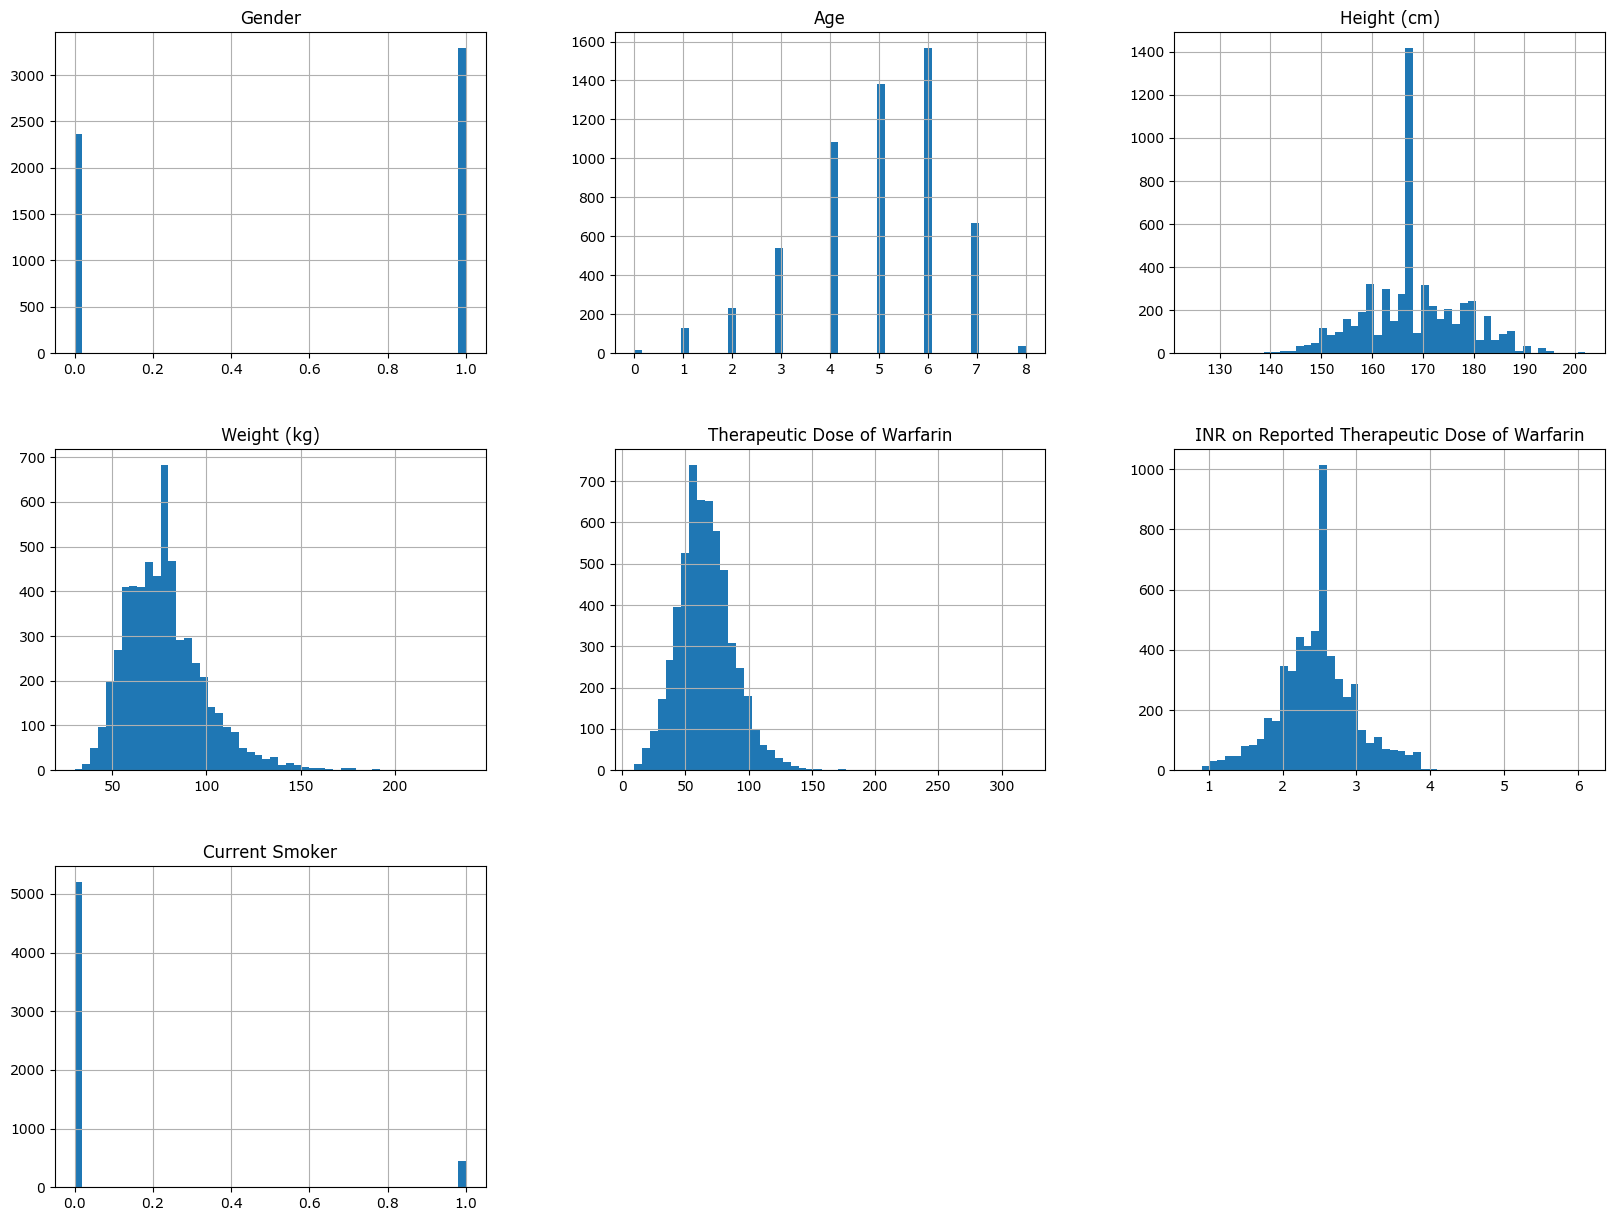

In [245]:
# Data visualization - histogram
clean_df.hist(bins=50, figsize=(20, 15))
plt.show()


In [246]:
# Data features correlation
corr_matrix = clean_df.corr()
print(corr_matrix["INR on Reported Therapeutic Dose of Warfarin"].sort_values(ascending=False))


INR on Reported Therapeutic Dose of Warfarin    1.000000
Therapeutic Dose of Warfarin                    0.778632
Weight (kg)                                     0.114127
Height (cm)                                     0.094355
Current Smoker                                  0.021757
Gender                                         -0.019756
Age                                            -0.026506
Name: INR on Reported Therapeutic Dose of Warfarin, dtype: float64


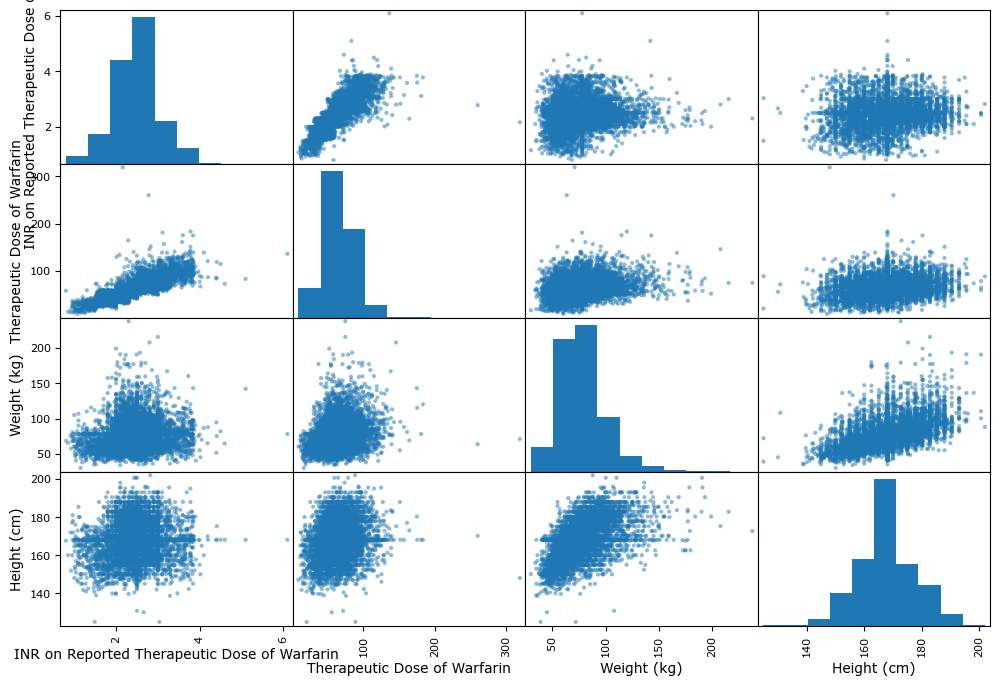

In [247]:
# Data visualization - scatter
attributes = ["INR on Reported Therapeutic Dose of Warfarin", "Therapeutic Dose of Warfarin", "Weight (kg)", "Height (cm)"]
pd.plotting.scatter_matrix(clean_df[attributes], figsize=(12, 8))
plt.show()


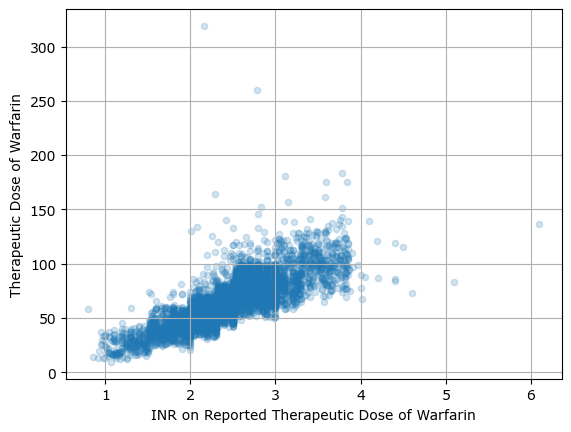

In [248]:
# visualize correlation between "INR on Reported Therapeutic Dose of Warfarin" and "Therapeutic Dose of Warfarin"
clean_df.plot(kind="scatter", x="INR on Reported Therapeutic Dose of Warfarin", y="Therapeutic Dose of Warfarin", alpha=0.2, grid=True)
plt.show()


In [249]:
# Frequence of each warfarin value
frq_dose, frq_INR = {}, {}
for i in range(len(clean_df)):
    frq_dose.setdefault(clean_df["Therapeutic Dose of Warfarin"][i], 0)
    frq_dose[clean_df["Therapeutic Dose of Warfarin"][i]] += 1

    frq_INR.setdefault(clean_df["INR on Reported Therapeutic Dose of Warfarin"][i], 0)
    frq_INR[clean_df["INR on Reported Therapeutic Dose of Warfarin"][i]] += 1

print(f'Total\nfrequence of dose:{len(frq_dose)}\n{sorted(frq_dose.keys(), reverse=True)}\nfrequence of INR:{len(frq_INR)}\n{sorted(frq_INR.keys(), reverse=True)}')

outliers_dose = [k for k, v in frq_dose.items() if v <= 1]
outliers_INR = [k for k, v in frq_INR.items() if v <= 1]

print(f'\nOutliers\nfrequence of dose:{len(outliers_dose)}\nfrequence of INR:{len(outliers_INR)}')


Total
frequence of dose:1093
[319.0, 260.0, 183.48, 181.02, 175.5, 175.0, 164.5, 161.2, 157.0, 152.0, 151.25, 146.0, 143.01, 141.0, 140.5, 139.5, 139.0, 138.5, 137.75, 136.5, 134.5, 134.25, 134.0, 133.03, 132.5, 132.01, 131.98, 131.0, 130.53, 130.1, 129.9, 129.39, 129.03, 129.0, 128.51, 128.5, 128.25, 128.02, 128.0, 127.99, 127.5, 126.5, 126.49, 125.5, 125.0, 124.5, 124.03, 124.0, 123.0, 122.75, 122.5, 122.47, 122.0, 121.51, 121.5, 121.03, 121.0, 120.4, 120.06201153430136, 120.0, 119.42, 119.06201153430136, 119.0, 118.99, 118.5, 118.06201153430136, 118.02, 118.0, 117.5, 117.06201153430136, 117.0, 116.97, 116.75, 116.5, 116.06201153430136, 116.03, 116.0, 115.75, 115.51, 115.5, 115.06201153430136, 115.0, 114.25, 114.06201153430136, 114.0, 113.75, 113.25, 113.06201153430136, 113.0, 112.5, 112.47, 112.39, 112.06201153430136, 112.06, 112.0, 111.97, 111.78, 111.75, 111.53, 111.06201153430136, 111.0, 110.5, 110.47, 110.06201153430136, 110.0, 109.5, 109.06201153430136, 109.0, 108.5, 108.25, 10

clean_df shape:(5567, 7)


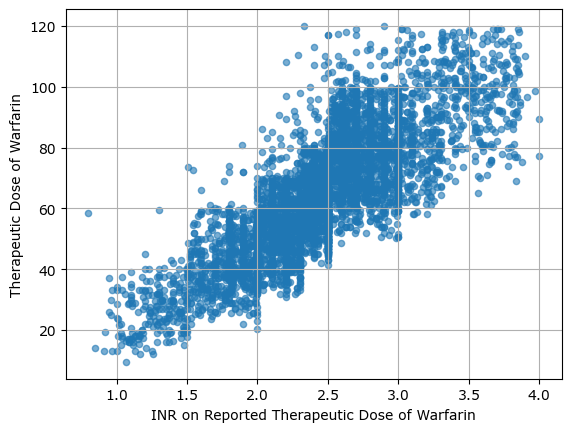

In [250]:
# Remove outliers
for i in range(len(clean_df)):
    #if clean_df["Therapeutic Dose of Warfarin"][i] in outliers_dose or clean_df["Therapeutic Dose of Warfarin"][i] > 100 or clean_df["INR on Reported Therapeutic Dose of Warfarin"][i] in outliers_INR:
    #    clean_df = clean_df.drop(index=i)
    
    if clean_df["Therapeutic Dose of Warfarin"][i] > 120 or clean_df["INR on Reported Therapeutic Dose of Warfarin"][i] > 4:
        clean_df = clean_df.drop(index=i)

clean_df = clean_df.reset_index()
clean_df = clean_df.drop(columns='index')
print(f'clean_df shape:{clean_df.shape}')

clean_df.plot(kind="scatter", x="INR on Reported Therapeutic Dose of Warfarin", y="Therapeutic Dose of Warfarin", alpha=0.6, grid=True)
plt.show()


In [251]:
# split training set(8) and test set(2)
train_set, test_set = train_test_split(clean_df, test_size=0.2, random_state=42)

# training set -> label & data_refered
ori_warfarin_labels = train_set['Therapeutic Dose of Warfarin'].copy(deep=True)
ori_warfarin_prepared = train_set.drop('Therapeutic Dose of Warfarin', axis=1)


# 2. Model

In [252]:
# display Cross-validation score
def display_cross_val_scores(scores):
    print('-Cross-validation score')
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    

-r2 score: 0.8509042114204641
-rmse score: 7.6675338442612135
-Cross-validation score
Scores: [ 95.15548742 110.5214066  115.14719051 107.45880299 113.42471684
  97.30871024 101.85717131 115.35784808 115.82286167 126.03509228]
Mean: 109.80892879323262
Standard deviation: 9.011421685967154


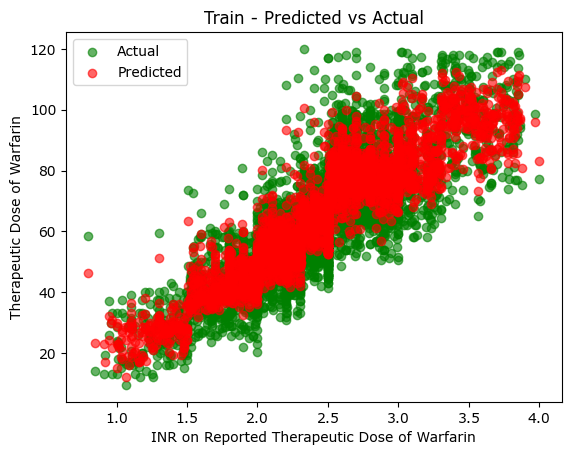

In [253]:
# Random forest
rdm_forest_reg = RandomForestRegressor(n_estimators=30, max_depth=10)

warfarin_prepared, warfarin_labels = ori_warfarin_prepared.copy(), ori_warfarin_labels.copy()
rdm_forest_reg.fit(warfarin_prepared, warfarin_labels)
warfarin_dose_predictions = rdm_forest_reg.predict(warfarin_prepared)

# Analyze model
r2 = r2_score(warfarin_labels, warfarin_dose_predictions)
print(f'-r2 score: {r2}')

lin_mse = mean_squared_error(warfarin_labels, warfarin_dose_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'-rmse score: {lin_rmse}')

scores = cross_val_score(rdm_forest_reg, warfarin_prepared, warfarin_labels, scoring="neg_mean_squared_error", cv=10)
display_cross_val_scores(-scores)

# Visualize the predicted vs actual house prices
plt.figure()
plt.scatter(warfarin_prepared['INR on Reported Therapeutic Dose of Warfarin'], warfarin_labels, label='Actual', c='green', alpha=0.6)
plt.scatter(warfarin_prepared['INR on Reported Therapeutic Dose of Warfarin'], warfarin_dose_predictions, label='Predicted', c='red', alpha=0.6)
plt.legend(loc='best')
plt.xlabel("INR on Reported Therapeutic Dose of Warfarin")
plt.ylabel("Therapeutic Dose of Warfarin")
plt.title("Train - Predicted vs Actual")
plt.show()


-r2 score: 0.7263778323834884
-rmse score: 10.456499732774455
-Cross-validation score
Scores: [138.67023467 126.35119173 147.50338314 125.30635535 110.43199987
 134.59353713 129.73111511 135.53361347 109.12036082  98.73856543]
Mean: 125.598035671274
Standard deviation: 14.391141741597956


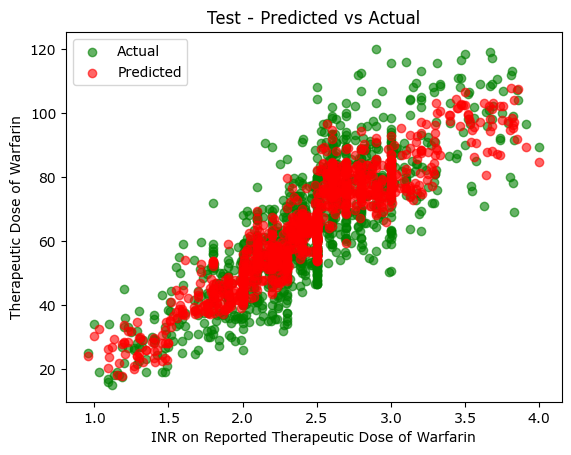

In [254]:
# Random forest - Test
final_model_RF = rdm_forest_reg

x_test = test_set.drop("Therapeutic Dose of Warfarin", axis = 1)
y_test = test_set["Therapeutic Dose of Warfarin"].copy()
final_predictions = final_model_RF.predict(x_test)

# Analyze model
r2 = r2_score(y_test, final_predictions)
print(f'-r2 score: {r2}')

lin_mse = mean_squared_error(y_test, final_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'-rmse score: {lin_rmse}')

scores = cross_val_score(rdm_forest_reg, x_test, y_test, scoring="neg_mean_squared_error", cv=10)
display_cross_val_scores(-scores)

# Visualize the predicted vs actual house prices
plt.figure()
plt.scatter(x_test['INR on Reported Therapeutic Dose of Warfarin'], y_test, label='Actual', c='green', alpha=0.6)
plt.scatter(x_test['INR on Reported Therapeutic Dose of Warfarin'], final_predictions, label='Predicted', c='red', alpha=0.6)
plt.legend(loc='best')
plt.xlabel("INR on Reported Therapeutic Dose of Warfarin")
plt.ylabel("Therapeutic Dose of Warfarin")
plt.title("Test - Predicted vs Actual")
plt.show()


# 3. Prediction

In [255]:
# data = ["Gender", "Age", "Height (cm)", "Weight (kg)", "INR on Reported Therapeutic Dose of Warfarin", "Current Smoker"]
# Gender:{'female': 0, 'male': 1}
# Age:{'10 - 19': 0, '20 - 29': 1, '30 - 39': 2, '40 - 49': 3, '50 - 59': 4, '60 - 69': 5, '70 - 79': 6, '80 - 89': 7, '90+': 8}

data = [[1.0, 1.0, 179.0, 69.9, 2.5, 0.0]]
warfarin_dose = final_model_RF.predict(data)
print(f"Therapeutic Dose of Warfarin:{round(warfarin_dose[0])}")


Therapeutic Dose of Warfarin:92


c:\Users\111\Programming\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
